In [326]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/Users/biruk/Documents/Ironhack/lab-eda-univariate/amz_uk_price_prediction_dataset.csv', index_col='uid')

In [260]:
df.tail(10)

,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
uid,,,,,,,,
2828582,B07JM93SCC,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing
2828585,B07DCFQMQL,Speed MaxX BODY ARMOUR CE MOTORBIKE/MOTORCYCLE...,3.6,66,49.99,False,0,Motorbike Clothing
2828586,B07JM5VQFX,Motorcycle Clothing Suit - Motorbike Suit With...,4.1,5,158.99,False,0,Motorbike Clothing
2828587,B07X98JLFF,GREAT BIKERS GEAR - Bobber Cafe Brat Style Lea...,3.6,12,14.99,False,0,Motorbike Clothing
2828588,B0BQMXJPP5,Helmet Ponytail Pigtails Twist Braids Hair wit...,0.0,0,19.99,False,0,Motorbike Clothing
2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


# Part 1
# Understanding Product Categories

In [5]:
# Generate a frequency table for the product category

frequency = pd.crosstab(index = df['category'],
           columns='count')
frequency

col_0,count
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


In [6]:
# sort listed product category counts
top_five = frequency.sort_values(by=['count'], ascending=False)


In [7]:
# top 5 most listed product categories

five = top_five.nlargest(5, 'count')
five

col_0,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


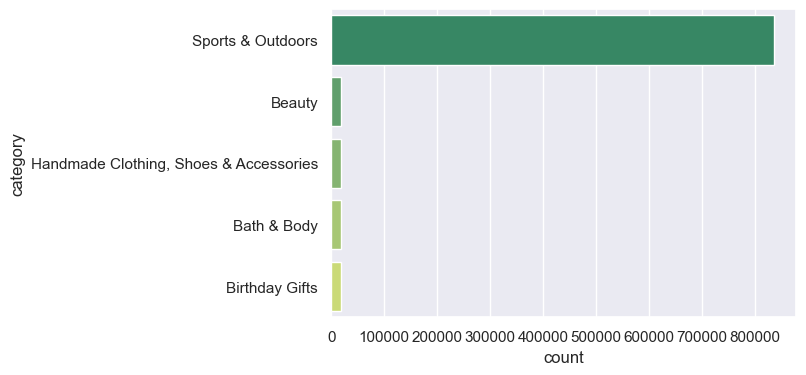

In [328]:
# Display the distribution of products across different categories using a bar chart. 
# If you face problems understanding the chart, do it for a subset of top categories

sns.set(rc={'figure.figsize':(6,4)})
ax = sns.barplot(x='count', y='category', data=five, palette='summer')


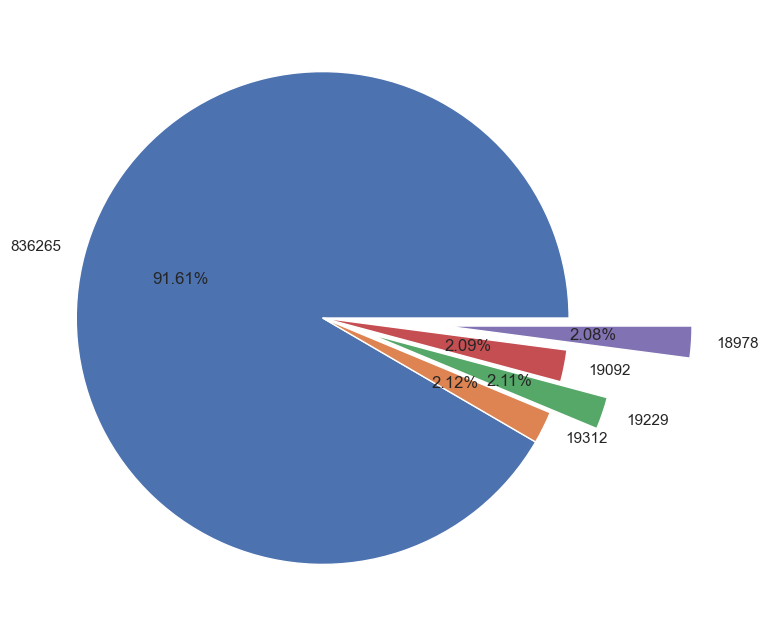

In [83]:
# Visualize proportions using a pie chart. 
# Sports & Outdoors dominate the listing category with (91.61%)
plt.figure(figsize = (10, 8))
plt.pie(five['count'],
       labels = five['count'].values,
       autopct = '%.2f%%',
       explode = [0, 0, 0.2, 0, 0.5 ])
plt.show()

# Part 2
## Measures of Centrality

#### Calculate the mean, median, and mode

In [210]:
df.describe()

,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [49]:
df['price'].mean().round(2)

89.24

In [41]:
df['price'].mode()

0    9.99
Name: price, dtype: float64

In [37]:
df['price'].round(2).median()

19.09

#### What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [75]:
# The average price point for products listed is 89.24 where as the most common price point is 9.99. 
# This shows there is no close relation between this two.

## Measures of Dispersion

#### Determine the variance, standard deviation, range, and interquartile range for product price

In [149]:
# Determine the Variance
df['price'].var()

119445.48532256528

In [163]:
# Determine the Standard Diviation
df['price'].std()

345.60886175352226

#### Determine the Range

In [176]:
min = df['price'].min()

In [174]:
max = df['price'].max()

In [206]:
range = max - min

In [208]:
range

100000.0

In [212]:
# The interquartile range
price_IQR = df['price'].describe()['75%'] - df['price'].describe()['25%']
price_IQR

36.0

#### How varied are the product prices? Are there any indicators of a significant spread in prices?

## Visualizations

In [219]:
# Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices.
# If its hard to read these diagrams, think why this is, and explain how it could be solved..

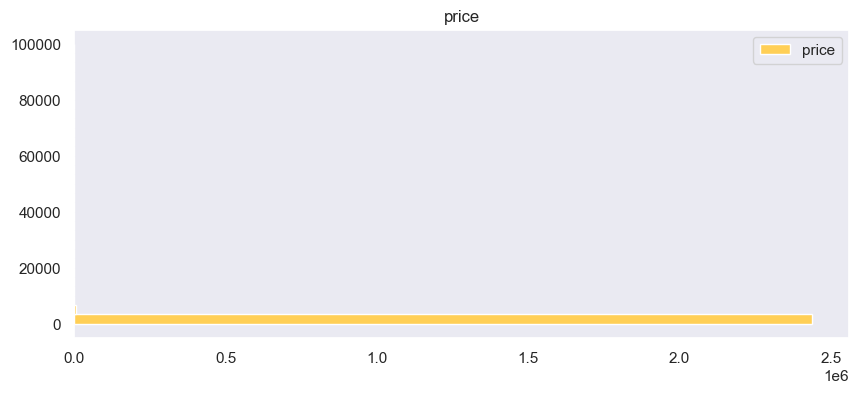

In [253]:
df.hist(column='price',
       grid=False,
       figsize=(10, 4),
       legend=True,
       bins=30,
       orientation='horizontal',
       color='#FFCF56');

In [ ]:
# it is hard to read the histogram because there is big outliers and most price lies towards zero.
# solution would be, clearing those outliers. 

<Axes: ylabel='price'>

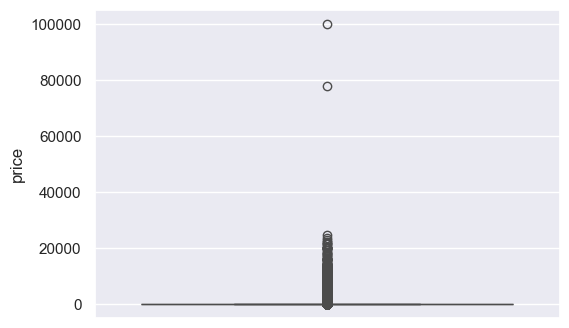

In [257]:
# Price significantly higher than the rest.
# The spread and potential outliers in product pricing.

sns.boxplot(df['price'])

# Part 3
## Unpacking Product Ratings

## Measures of Centrality

In [282]:
# Calculate the mean, median, and mode for the rating of products.
df['stars'].describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [266]:
df['stars'].mean().round(2)

2.15

In [270]:
df['stars'].median()

0.0

In [286]:
df['stars'].mode()

0    0.0
Name: stars, dtype: float64

In [ ]:
# How do customers generally rate products? Is there a common trend?

# By looking at the 50% on describe(), customers usually tend not to rate a product.

## Measures of Dispersion

#### Determine the variance, standard deviation, and interquartile range for product rating

In [302]:
# Determine the Variance
df['stars'].var()

4.81743402976196

In [304]:
df['stars'].std()

2.1948653785054697

In [306]:
# The interquartile range
star_IQR = df['stars'].describe()['75%'] - df['price'].describe()['25%']
star_IQR

-5.59

#### Are the ratings consistent, or is there a wide variation in customer feedback?

In [ ]:
# The standard diviation shows that the ratings are pointing at 2.19 out of 5 start rating.
# Customer feedbacks are mostly around the mean. But that might not be true as there are outliers around zero starts.

## Shape of the Distribution

#### Calculate the skewness and kurtosis for the rating column

In [311]:
df['stars'].skew()

0.08120735761080985

In [313]:
df['stars'].kurtosis()

-1.9260061280432985

#### Are the ratings normally distributed, or do they lean towards higher or lower values?

<Axes: xlabel='stars', ylabel='Density'>

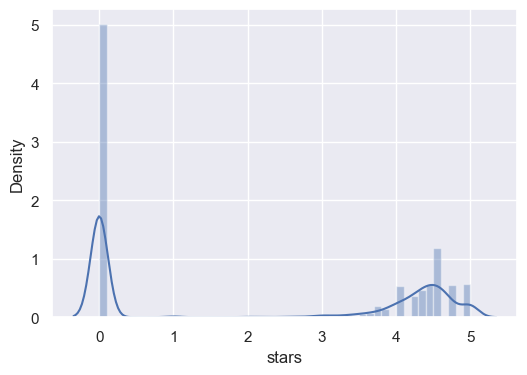

In [330]:
sns.distplot(df['stars'], hist = True)

In [ ]:
# The ratings are not normally distributed because the majority of the ratings tend not rating at all or they give zero ratings. 
# but if we see on the right side of the graph, we notice people also give more ratings starting from 3.5 stars up to 5 stars.

## Visualizations

#### Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

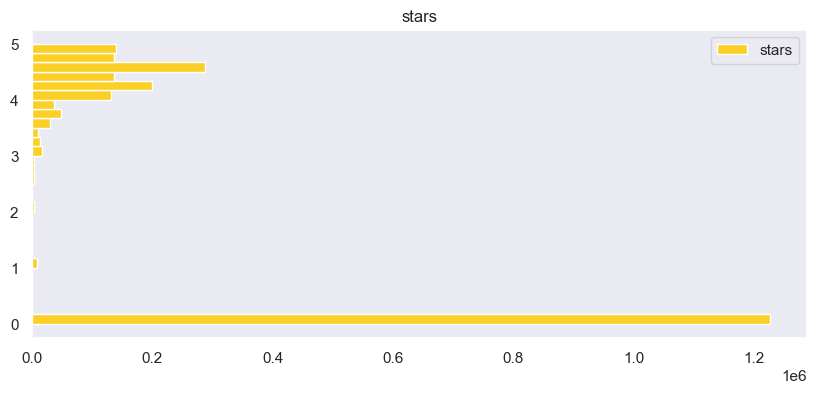

In [324]:
df.hist(column='stars',
       grid=False,
       figsize=(10, 4),
       legend=True,
       bins=30,
       orientation='horizontal',
       color='#FCCF26');